In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

In [ ]:
path='/content/sample_data/코스피 200 내역.csv'
raw_df = pd.read_csv(path)  # investing.com 로부터 데이터 다운로드

raw_df.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2007-10-26,255.65,249.95,255.65,247.67,136.89M,2.75%
1,2007-10-29,260.40,258.38,261.45,257.75,135.22M,1.86%
2,2007-10-30,258.87,259.51,260.54,256.85,122.93M,-0.59%
3,2007-10-31,260.42,258.78,260.60,257.82,119.11M,0.60%
4,2007-11-01,260.76,263.06,263.15,258.71,122.33M,0.13%


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_te

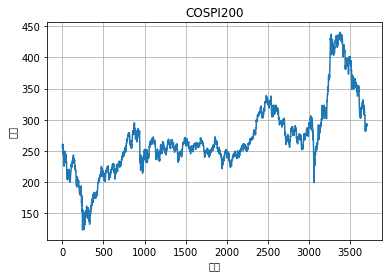

In [ ]:
plt.title('COSPI200')
plt.ylabel('종가')
plt.xlabel('기간')
plt.grid()

plt.plot(raw_df['종가'], label='종가')

plt.show()

In [ ]:
# 통계정보 확인

raw_df.describe()

,종가,오픈,고가,저가
count,3709.000000,3709.000000,3709.000000,3709.000000
mean,269.464470,269.597137,271.143510,267.709385
std,57.417674,57.467237,57.645337,57.301917
min,123.270000,121.310000,127.660000,117.910000
25%,241.270000,241.250000,242.730000,239.640000
50%,260.100000,259.990000,261.240000,258.790000
75%,291.280000,292.120000,293.590000,289.860000
max,440.400000,440.780000,449.040000,438.750000


In [ ]:
# Missing Data 확인

raw_df.isnull().sum()

날짜      0
종가      0
오픈      0
고가      0
저가      0
거래량     0
변동 %    0
dtype: int64

In [ ]:
# 최소값이 0 인 column 체크

for col in raw_df.columns:

    if raw_df[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

In [ ]:
raw_df.loc[raw_df['거래량']==0]

,날짜,종가,오픈,고가,저가,거래량,변동 %


In [ ]:
# 각 column에 0 몇개인지 확인

for col in raw_df.columns:

    missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

날짜: 0
종가: 0
오픈: 0
고가: 0
저가: 0
거래량: 0
변동 %: 0


In [ ]:
# 먼저 0 을 NaN 으로 바꾼후, Missing Data 처리

raw_df['거래량'] = raw_df['거래량'].replace(0, np.nan)

# 각 column에 0 몇개인지 확인

for col in raw_df.columns:

    missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

날짜: 0
종가: 0
오픈: 0
고가: 0
저가: 0
거래량: 0
변동 %: 0


In [ ]:
# missing data 확인

raw_df.isnull().sum()

날짜      0
종가      0
오픈      0
고가      0
저가      0
거래량     0
변동 %    0
dtype: int64

In [ ]:
raw_df.isnull().any()

날짜      False
종가      False
오픈      False
고가      False
저가      False
거래량     False
변동 %    False
dtype: bool

In [ ]:
raw_df.loc[raw_df['오픈'].isna()]

,날짜,종가,오픈,고가,저가,거래량,변동 %


In [ ]:
# missing data 처리

raw_df = raw_df.dropna()

raw_df.isnull().sum()

날짜      0
종가      0
오픈      0
고가      0
저가      0
거래량     0
변동 %    0
dtype: int64

In [ ]:
# 데이터 타입 확인

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3709 entries, 0 to 3708
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      3709 non-null   object 
 1   종가      3709 non-null   float64
 2   오픈      3709 non-null   float64
 3   고가      3709 non-null   float64
 4   저가      3709 non-null   float64
 5   거래량     3709 non-null   object 
 6   변동 %    3709 non-null   object 
dtypes: float64(4), object(3)
memory usage: 231.8+ KB


In [ ]:
raw_df['거래량']=raw_df['거래량'].str.replace('M','0000')
raw_df['거래량']=raw_df['거래량'].str.replace('K','0')
raw_df['거래량']=raw_df['거래량'].str.replace('.','')
raw_df['거래량']=raw_df['거래량'].astype(float)
raw_df['거래량'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


0    136890000.0
1    135220000.0
2    122930000.0
3    119110000.0
4    122330000.0
Name: 거래량, dtype: float64

In [ ]:
raw_df['변동 %']=raw_df['변동 %'].str.replace('%','')
raw_df['변동 %']=raw_df['변동 %'].astype(float)
raw_df['변동 %'].head()

0    2.75
1    1.86
2   -0.59
3    0.60
4    0.13
Name: 변동 %, dtype: float64

In [ ]:
# 정규화 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['종가','거래량']

scaled_df = scaler.fit_transform(raw_df[scale_cols])

scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)

print(scaled_df)

            종가       거래량
0     0.417431  0.219699
1     0.432409  0.217018
2     0.427585  0.197288
3     0.432472  0.191155
4     0.433545  0.196324
...        ...       ...
3704  0.521237  0.164281
3705  0.530382  0.186452
3706  0.530729  0.186724
3707  0.537887  0.193146
3708  0.527544  0.176145

[3709 rows x 2 columns]


In [ ]:
# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list)

In [ ]:
# feature_df, label_df 생성

feature_cols = [ '종가', '거래량' ]
label_cols = [ '종가' ]

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

In [ ]:
# DataFrame => Numpy 변환

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

(3709, 2) (3709, 1)


In [ ]:
window_size = 30

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

(3679, 30, 2) (3679, 1)


In [ ]:
# train, test 분리

split = -1100 #train:test = 7:3

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2579, 30, 2) (2579, 1)
(1100, 30, 2) (1100, 1)


In [ ]:
# model 생성

model = Sequential()

model.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape))

model.add((Dense(1, activation='linear')))

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               67072     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67,201
Trainable params: 67,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=100, batch_size=10,
          callbacks=[early_stop])

Epoch 1/100
258/258 [==============================] - 7s 22ms/step - loss: 0.0022 - mae: 0.0238 - val_loss: 8.9542e-04 - val_mae: 0.0223
Epoch 2/100
258/258 [==============================] - 5s 21ms/step - loss: 3.1230e-04 - mae: 0.0134 - val_loss: 6.0496e-04 - val_mae: 0.0184
Epoch 3/100
258/258 [==============================] - 5s 21ms/step - loss: 3.0063e-04 - mae: 0.0134 - val_loss: 5.3025e-04 - val_mae: 0.0174
Epoch 4/100
258/258 [==============================] - 6s 23ms/step - loss: 2.3143e-04 - mae: 0.0114 - val_loss: 8.3372e-04 - val_mae: 0.0215
Epoch 5/100
258/258 [==============================] - 5s 21ms/step - loss: 2.3405e-04 - mae: 0.0117 - val_loss: 5.6030e-04 - val_mae: 0.0175
Epoch 6/100
258/258 [==============================] - 5s 21ms/step - loss: 2.2531e-04 - mae: 0.0116 - val_loss: 5.5612e-04 - val_mae: 0.0192
Epoch 7/100
258/258 [==============================] - 5s 21ms/step - loss: 2.0869e-04 - mae: 0.0110 - val_loss: 5.4304e-04 - val_mae: 0.0192
Epoch 8/10

35/35 [==============================] - 1s 10ms/step


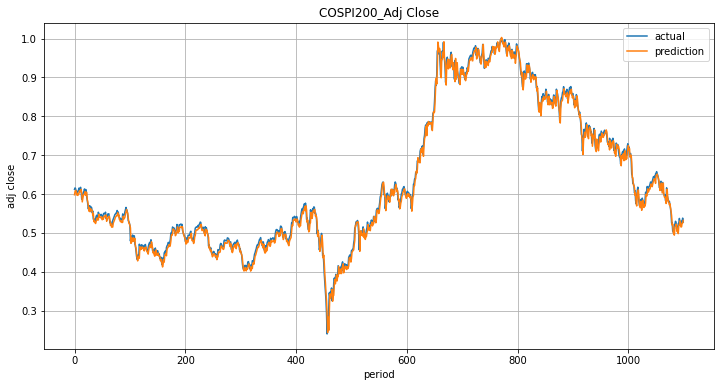

In [ ]:
pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('COSPI200_Adj Close')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
# 반정규화를 위한 정규화 재정의

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['종가']

scaled_df = scaler.fit_transform(raw_df[scale_cols])

scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)

print(scaled_df)

            종가
0     0.417431
1     0.432409
2     0.427585
3     0.432472
4     0.433545
...        ...
3704  0.521237
3705  0.530382
3706  0.530729
3707  0.537887
3708  0.527544

[3709 rows x 1 columns]


In [ ]:
date='2022-10-28'  #예측날짜
pred_raw = scaler.inverse_transform(pred)
pred_nextday=pred_raw[-1]
print(date+' 예측종가는 \{}입니다.'.format(pred_nextday))

2022-10-28 예측종가는 \[291.92896]입니다.


# 거래량 예측

In [ ]:
# 정규화 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['거래량']

scaled_df = scaler.fit_transform(raw_df[scale_cols])

scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)


# feature_df, label_df 생성

feature_cols = ['거래량']
label_cols = ['거래량']

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

# DataFrame => Numpy 변환

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

window_size = 30

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

# train, test 분리

#split = int(len(X)*0.95)
split = -1100

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

# model 생성

model = Sequential()

model.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape))

model.add((Dense(1, activation='linear')))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
#model 실행
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=100, batch_size=10,
          callbacks=[early_stop])

Epoch 1/100
348/348 [==============================] - 8s 20ms/step - loss: 0.0024 - mae: 0.0269 - val_loss: 0.0078 - val_mae: 0.0458
Epoch 2/100
348/348 [==============================] - 7s 19ms/step - loss: 0.0017 - mae: 0.0242 - val_loss: 0.0078 - val_mae: 0.0473
Epoch 3/100
348/348 [==============================] - 6s 19ms/step - loss: 0.0015 - mae: 0.0223 - val_loss: 0.0082 - val_mae: 0.0564
Epoch 4/100
348/348 [==============================] - 7s 19ms/step - loss: 0.0015 - mae: 0.0226 - val_loss: 0.0075 - val_mae: 0.0467
Epoch 5/100
348/348 [==============================] - 7s 19ms/step - loss: 0.0015 - mae: 0.0211 - val_loss: 0.0074 - val_mae: 0.0470
Epoch 6/100
348/348 [==============================] - 7s 19ms/step - loss: 0.0015 - mae: 0.0217 - val_loss: 0.0080 - val_mae: 0.0490
Epoch 7/100
348/348 [==============================] - 7s 19ms/step - loss: 0.0014 - mae: 0.0212 - val_loss: 0.0075 - val_mae: 0.0488
Epoch 8/100
348/348 [==============================] - 7s 19ms

7/7 [==============================] - 1s 10ms/step


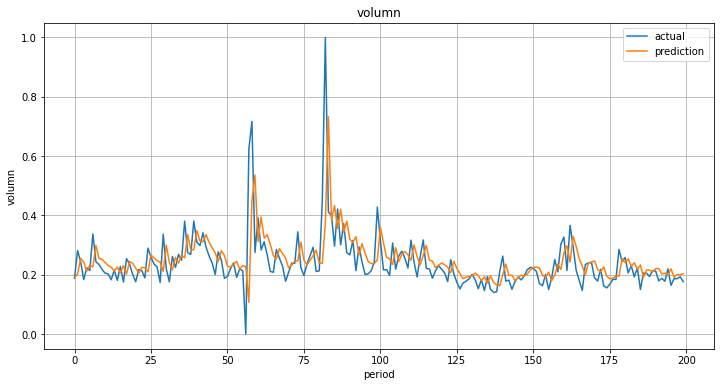

In [ ]:
pred_volumn = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('volumn')
plt.ylabel('volumn')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred_volumn, label='prediction')
plt.grid()
plt.legend(loc='best')
plt.show()

In [ ]:
pred_volumn_raw = scaler.inverse_transform(pred_volumn)
pred_volumn_nextday=pred_volumn_raw[-1]
print(date+' 예측거래량은 {}입니다.'.format(pred_volumn_nextday))

2022-10-28 예측거래량은 [1.26738664e+08]입니다.
